## **Cyclone Image Classification using CNN:**

**The Aim of this Notebook  is to develop Cyclone Image Classification Model**

In [ ]:
##Import the Required Libraries¶

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#tf.__version__

In [ ]:
##Data Augmentation & Data Loading

In [ ]:
##Loading the Images
#Colab to write python code

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Root Path of our dataset

In [3]:
path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

In [ ]:
#Random image of Severe Tropical Storm 

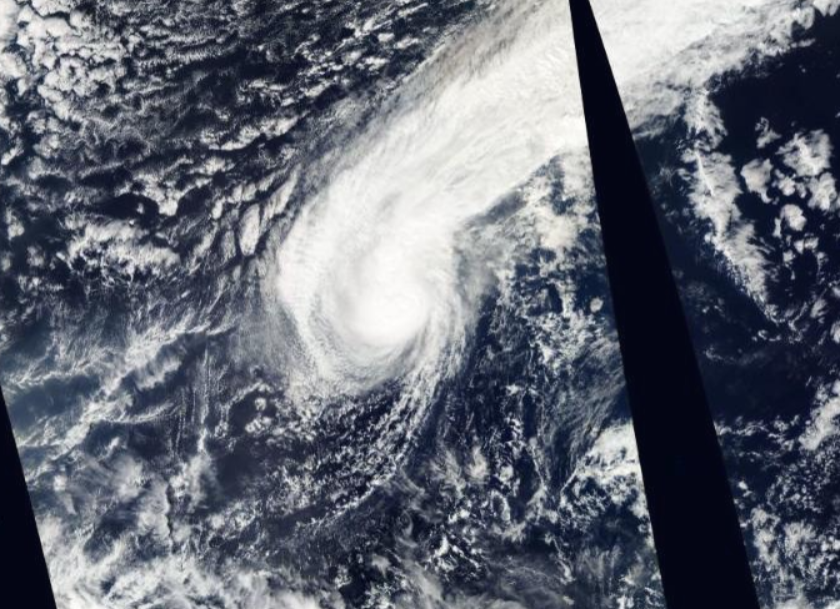

In [5]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test_50/Severe Tropical Storm_SS/jan1-17.30-2005.PNG')

In [ ]:
#Image of - Tropical Depression

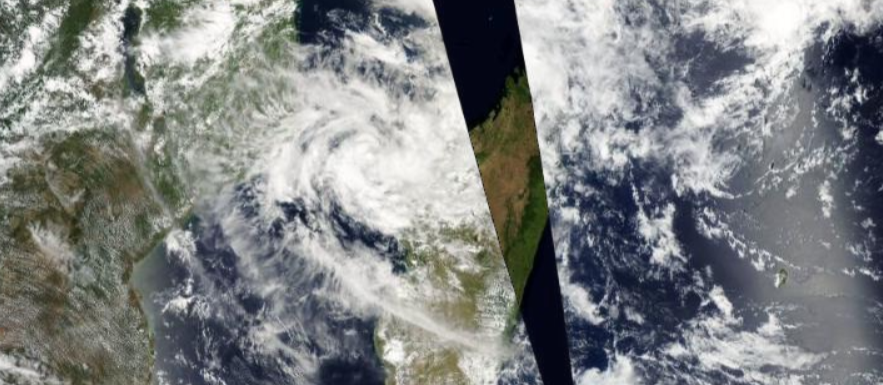

In [6]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test_50/Tropical Storm_S/Dec30-23.30-2003.PNG')

In [ ]:
##Image of - Tropical Strom

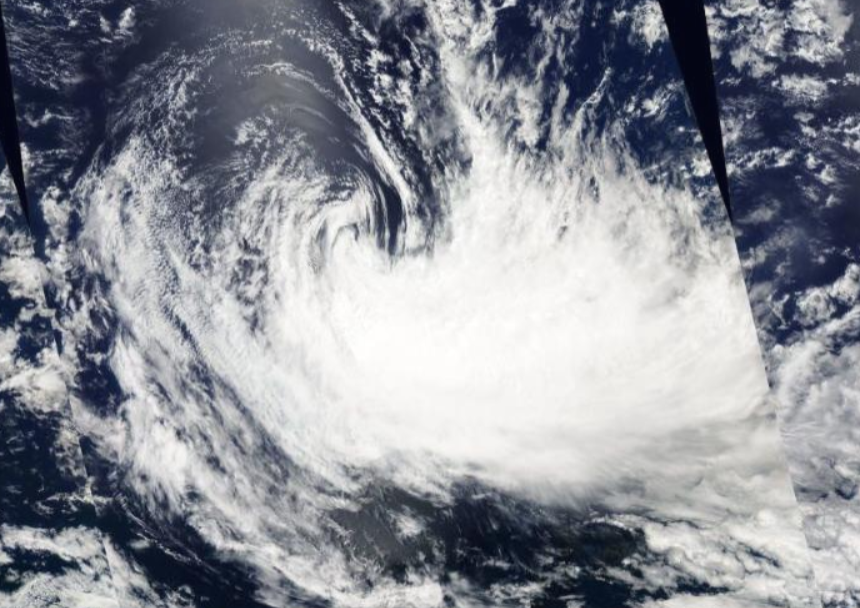

In [7]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test_50/Tropical_Depression_D/2009-20.30-june12.png')



In [ ]:
##Image of - Typhoon

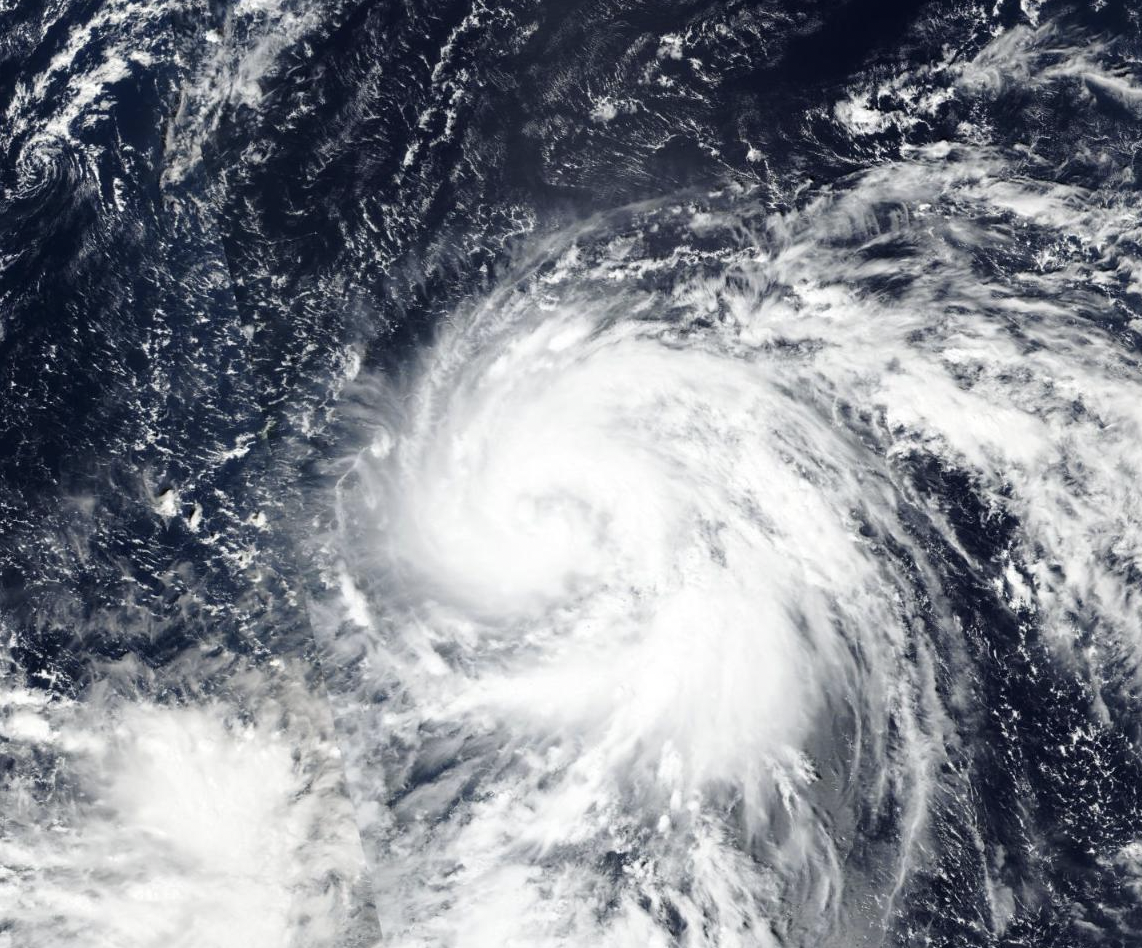

In [8]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test_50/Typhoon_T/Screenshot 2022-01-10 at 11.39.24 PM.png')

# Data PreProcessing

**Data Augmentation & Data Loading**

In [ ]:
#Image Augmentation using Keras ImageDataGenerator


In [9]:
training_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

In [10]:
train_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                                         target_size=(64,64),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 160 images belonging to 4 classes.


In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [12]:
train_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [13]:
test_datagenrator=ImageDataGenerator(rescale = 1./255)

In [14]:
test_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                                        target_size=(64,64),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 80 images belonging to 4 classes.


## **Create Convolutional Neural Network to Classify the Cyclone Images** 

In [ ]:
##BUILDING AND TRAINING THE NETWORK

In [ ]:
#num of inputs+num out put/2
#(1152+4)/2

In [15]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=4, activation='softmax'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

**Compile the Model**

In [16]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

**Training our model**

In [17]:
hist=classifier.fit_generator(train_dataset,epochs=60,validation_data=train_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
5/5 [==============================] - 66s 13s/step - loss: 1.4129 - accuracy: 0.2125 - val_loss: 1.3729 - val_accuracy: 0.3625
Epoch 2/60
5/5 [==============================] - 14s 3s/step - loss: 1.3729 - accuracy: 0.3500 - val_loss: 1.3487 - val_accuracy: 0.4625
Epoch 3/60
5/5 [==============================] - 14s 3s/step - loss: 1.3317 - accuracy: 0.4250 - val_loss: 1.2662 - val_accuracy: 0.5562
Epoch 4/60
5/5 [==============================] - 14s 3s/step - loss: 1.2236 - accuracy: 0.5063 - val_loss: 1.1221 - val_accuracy: 0.4500
Epoch 5/60
5/5 [==============================] - 14s 3s/step - loss: 1.0662 - accuracy: 0.5750 - val_loss: 1.0407 - val_accuracy: 0.5312
Epoch 6/60
5/5 [==============================] - 14s 3s/step - loss: 1.0042 - accuracy: 0.5437 - val_loss: 0.8903 - val_accuracy: 0.6438
Epoch 7/60
5/5 [==============================] - 14s 3s/step - loss: 0.9383 - accuracy: 0.6187 - val_loss: 0.9593 - val_accuracy: 0.5750
Epoch 8/60
5/5 [=================

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [19]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [20]:
predictions=classifier.predict(test_dataset)
predictions

array([[2.18204632e-01, 3.55881006e-02, 7.38491118e-01, 7.71609787e-03],
       [9.35355201e-02, 1.30422413e-03, 9.02402699e-01, 2.75753741e-03],
       [9.91699994e-01, 5.37180256e-09, 3.70849948e-03, 4.59147710e-03],
       [9.66442943e-01, 1.62233657e-04, 2.94422414e-02, 3.95257073e-03],
       [1.05161509e-02, 5.15630066e-01, 4.73830521e-01, 2.32593356e-05],
       [1.31345196e-02, 2.91761197e-02, 9.57675040e-01, 1.42174313e-05],
       [1.56592787e-03, 9.50739861e-01, 4.76938821e-02, 2.28223868e-07],
       [9.54570055e-01, 1.76461263e-08, 3.78185324e-02, 7.61148287e-03],
       [6.47471130e-01, 2.23415397e-09, 2.25528449e-01, 1.27000406e-01],
       [9.56694126e-01, 8.20289461e-06, 4.17982601e-02, 1.49941840e-03],
       [6.08386219e-01, 4.03720833e-06, 2.44797692e-02, 3.67129952e-01],
       [9.75387335e-01, 1.09854108e-03, 2.12342758e-02, 2.27980572e-03],
       [1.81949392e-01, 9.91583420e-08, 8.01657259e-01, 1.63933523e-02],
       [4.61594053e-02, 1.87829812e-03, 8.66825581e

In [21]:
predictions=np.argmax(predictions,axis=1)
predictions

array([2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 3, 0, 2, 0, 1, 1,
       2, 1, 0, 0, 2, 2, 2, 3, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3])

In [22]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [23]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.6375

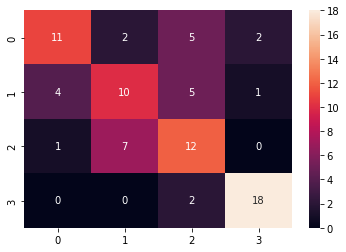

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.53      0.50      0.51        20
           2       0.50      0.60      0.55        20
           3       0.86      0.90      0.88        20

    accuracy                           0.64        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.64      0.64      0.64        80



Text(0, 0.5, 'Train and test loss ')

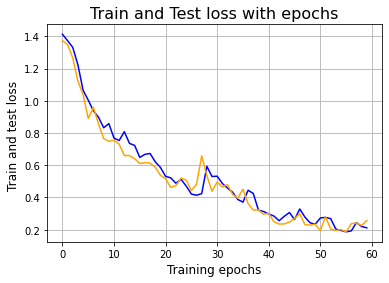

In [27]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss ',fontsize=12)

Text(0, 0.5, 'Train and test accuracy')

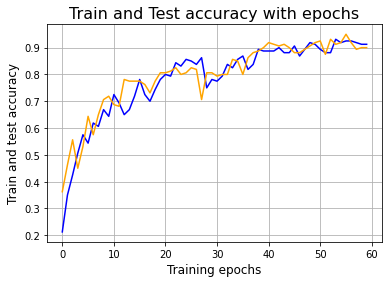

In [29]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)

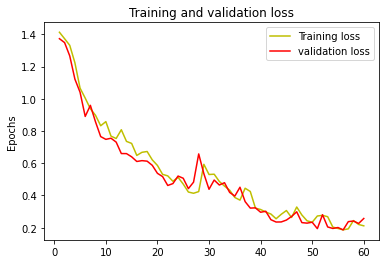

In [30]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

**Prediction Using Trained Model**

In [ ]:
#classifying one single image

In [31]:
image=cv2.imread('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/sam_test/moderate_TS_S.png')

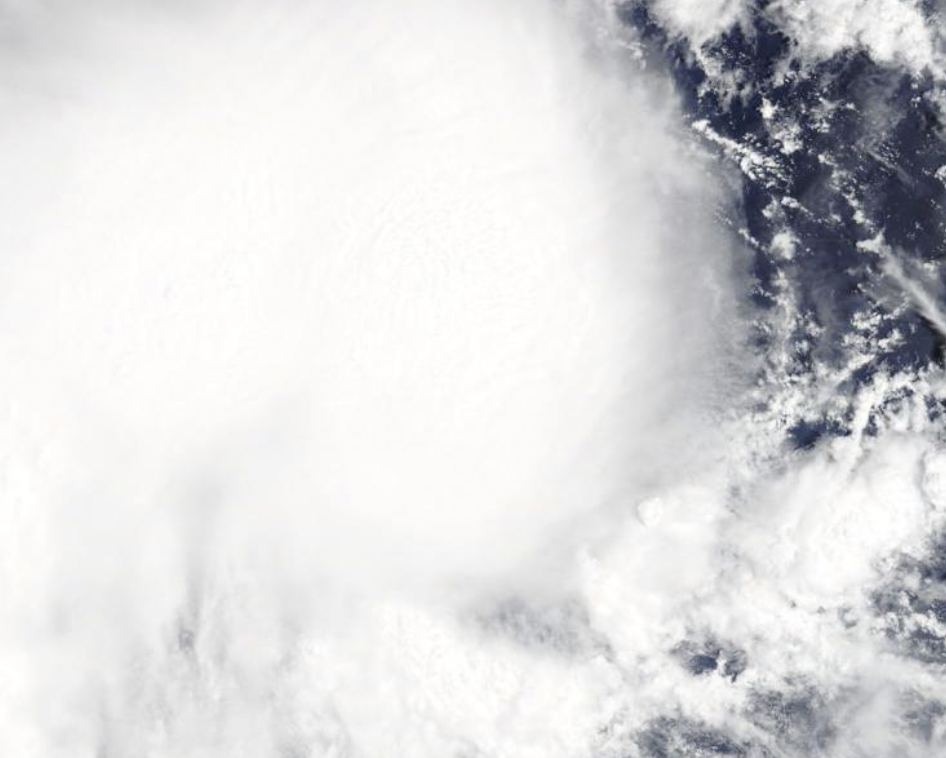

In [32]:
cv2_imshow(image)

In [33]:
image.shape

(758, 946, 3)

In [ ]:
#image

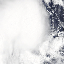

In [34]:
#reshape image
image=cv2.resize(image,(64,64))
cv2_imshow(image)

In [35]:
image

array([[[206, 205, 205],
        [211, 210, 211],
        [211, 210, 210],
        ...,
        [220, 221, 219],
        [119, 107, 103],
        [131, 120, 118]],

       [[203, 201, 200],
        [209, 207, 207],
        [211, 209, 209],
        ...,
        [246, 247, 248],
        [200, 195, 192],
        [169, 162, 159]],

       [[203, 201, 201],
        [206, 205, 205],
        [212, 210, 211],
        ...,
        [241, 240, 241],
        [229, 229, 229],
        [174, 171, 169]],

       ...,

       [[250, 251, 253],
        [249, 250, 251],
        [244, 246, 246],
        ...,
        [170, 166, 165],
        [139, 133, 128],
        [216, 214, 212]],

       [[249, 250, 251],
        [252, 253, 254],
        [246, 248, 249],
        ...,
        [205, 203, 202],
        [181, 171, 171],
        [188, 185, 184]],

       [[249, 250, 251],
        [252, 254, 254],
        [248, 250, 250],
        ...,
        [202, 199, 198],
        [201, 199, 198],
        [205, 201, 200]]

In [36]:
image=image/255

In [37]:
image

array([[[0.80784314, 0.80392157, 0.80392157],
        [0.82745098, 0.82352941, 0.82745098],
        [0.82745098, 0.82352941, 0.82352941],
        ...,
        [0.8627451 , 0.86666667, 0.85882353],
        [0.46666667, 0.41960784, 0.40392157],
        [0.51372549, 0.47058824, 0.4627451 ]],

       [[0.79607843, 0.78823529, 0.78431373],
        [0.81960784, 0.81176471, 0.81176471],
        [0.82745098, 0.81960784, 0.81960784],
        ...,
        [0.96470588, 0.96862745, 0.97254902],
        [0.78431373, 0.76470588, 0.75294118],
        [0.6627451 , 0.63529412, 0.62352941]],

       [[0.79607843, 0.78823529, 0.78823529],
        [0.80784314, 0.80392157, 0.80392157],
        [0.83137255, 0.82352941, 0.82745098],
        ...,
        [0.94509804, 0.94117647, 0.94509804],
        [0.89803922, 0.89803922, 0.89803922],
        [0.68235294, 0.67058824, 0.6627451 ]],

       ...,

       [[0.98039216, 0.98431373, 0.99215686],
        [0.97647059, 0.98039216, 0.98431373],
        [0.95686275, 0

In [38]:
image.shape

(64, 64, 3)

In [39]:
image=image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [40]:
result =classifier.predict(image)
result


array([[1.0194447e-01, 7.4329688e-03, 8.9058322e-01, 3.9399416e-05]],
      dtype=float32)

In [41]:
result=np.argmax(result)
result

2

In [42]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [ ]:
#The model correctly classified the input image as Tropical Strom.

**Save and Load Model**

In [ ]:
##Saving and loading the model

In [43]:
model_json=classifier.to_json()
with open('classifier.json','w') as json_file:
  json_file.write(model_json)

In [44]:
from keras.models import save_model
classifier_saved=save_model(classifier,'/content/weights.hdf5')

In [45]:
with open('classifier.json','r') as json_file:
  json_saved_model=json_file.read()
json_saved_model 

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "d

In [46]:
classifier_loaded=tf.keras.models.model_from_json(json_saved_model)
classifier_loaded.load_weights('weights.hdf5')
classifier_loaded.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])


In [47]:
classifier_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0